In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
from qiskit.circuit import Parameter
import networkx as nx
from typing import List
import numpy as np
%matplotlib inline

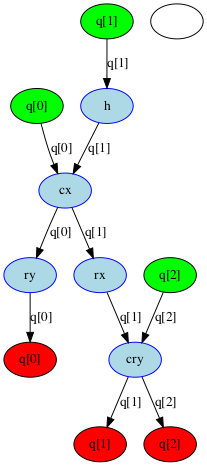

In [7]:
q = QuantumRegister(3, 'q')
#c = ClassicalRegister(4, 'c')
theta = Parameter('Θ')
circ = QuantumCircuit(q)
circ.h(q[1])
circ.cx(q[0], q[1])
circ.ry(theta, q[0])
circ.rx(0.5, q[1])
circ.cry(theta, q[1],q[2])
#circ.measure(q,c)

dag = circuit_to_dag(circ)
dag_nx = dag.to_networkx()
nodelist = list(dag.topological_op_nodes())
dag_drawer(dag)


In [3]:
circ.draw()

┌───────┐          
q_0: ───────■───┤ Ry(Θ) ├──────────
     ┌───┐┌─┴─┐┌┴───────┴┐         
q_1: ┤ H ├┤ X ├┤ Rx(0.5) ├────■────
     └───┘└───┘└─────────┘┌───┴───┐
q_2: ─────────────────────┤ Ry(Θ) ├
                          └───────┘

In [48]:
allnodelist = list(dag.topological_nodes())
in_nodes_ids = []
in_nodes = []
op_nodes_ids = []
op_nodes = []
for i,node in enumerate(allnodelist):
    if node.type == 'in':
        in_nodes_ids.append(i)
        in_nodes.append(node)
    elif node.type == 'op':
        op_nodes_ids.append(i)
        op_nodes.append(node)
in_nodes_ids = np.array(in_nodes_ids)
op_nodes_ids = np.array(op_nodes_ids)

all_adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(dag_nx, allnodelist).toarray()

all_adj_matrix = np.arange(121).reshape(11,11)
op_adj_matrix = all_adj_matrix[op_nodes_ids[:, None], op_nodes_ids]
in_op_adj_matrix = all_adj_matrix[in_nodes_ids[:, None], op_nodes_ids]

In [49]:
print(in_nodes_ids)
print(op_nodes_ids)

[0 1 7]
[2 3 4 5 8]


In [50]:
print(all_adj_matrix)
print(op_adj_matrix)
print(in_op_adj_matrix)

[[  0   1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54]
 [ 55  56  57  58  59  60  61  62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98]
 [ 99 100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120]]
[[24 25 26 27 30]
 [35 36 37 38 41]
 [46 47 48 49 52]
 [57 58 59 60 63]
 [90 91 92 93 96]]
[[ 2  3  4  5  8]
 [13 14 15 16 19]
 [79 80 81 82 85]]


In [31]:
all_adj_matrix

array([0, 0, 0, 0, 0])